# Assignment Week 2

* Answer each question completely.
* Include your code and summarize what you see in a brief narrative.

__Charting:__
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer.
- model: specific model of the car  
- trim: subtype of the car model.
- body: body style of the car.
- transmission: type of transmission  
- state: state car is registered.
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats).
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

## Question 1. Determine the number of missing values in each column.

In [24]:
df.isnull().any(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
558832     True
558833    False
558834    False
558835    False
558836    False
Length: 558837, dtype: bool

Sample narrative description.

## Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [21]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition        object
odometer        float64
color            object
interior         object
seller           object
mmr              object
sellingprice      int64
saledate         object
dtype: object

Sample narrative description.

## Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding).

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [25]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['acura',
 'acura',
 'airstream',
 'aston martin',
 'audi',
 'audi',
 'bentley',
 'bmw',
 'bmw',
 'buick',
 'buick',
 'cadillac',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chevrolet',
 'chrysler',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc',
 'gmc truck',
 'honda',
 'honda',
 'hummer',
 'hyundai',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'jeep',
 'kia',
 'kia',
 'lamborghini',
 'land rover',
 'land rover',
 'landrover',
 'lexus',
 'lexus',
 'lincoln',
 'lincoln',
 'lotus',
 'maserati',
 'maserati',
 'mazda',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mercury',
 'mini',
 'mitsubishi',
 'mitsubishi',
 'nan',
 'nissan',
 'nissan',
 'oldsmobile',
 'oldsmobile',
 'plymouth',
 'plymouth',
 'pontiac',
 'pontiac',
 'porsche',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 's

unique elements are printed in the sorted order in lower case

In [26]:
df['make'] = df['make'].str.lower().replace(r'\b(tk|truck|-b|-benz)\b', '', regex=True).str.replace(' ', '')

Sample narrative description.

## Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

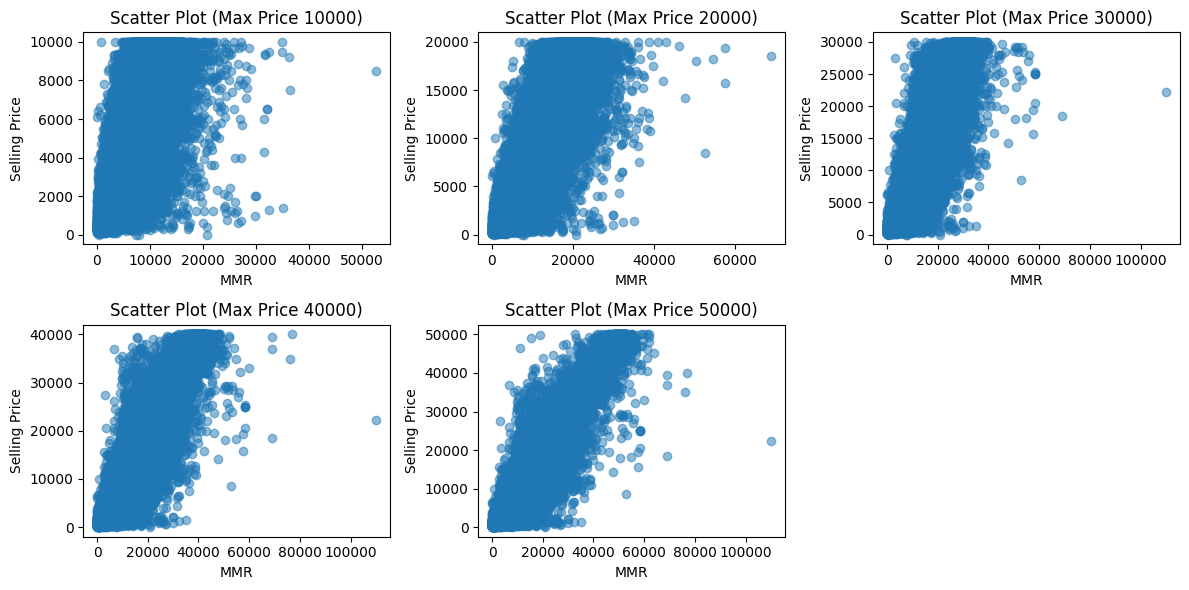

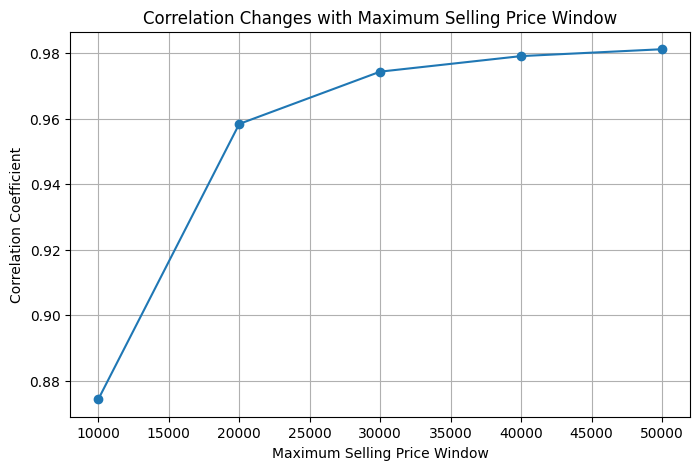

In [28]:
price_windows = [10000, 20000, 30000, 40000, 50000]
correlations = []
scatter_data = []

for window in price_windows:
    filtered_data = df[df['sellingprice'] <= window]
    correlation = filtered_data['mmr'].corr(filtered_data['sellingprice'])
    correlations.append(correlation)
    scatter_data.append(filtered_data[['mmr', 'sellingprice']])

plt.figure(figsize=(12, 6))
for i, data in enumerate(scatter_data):
    plt.subplot(2, 3, i+1)
    plt.scatter(data['mmr'], data['sellingprice'], alpha=0.5)
    plt.title(f'Scatter Plot (Max Price {price_windows[i]})')
    plt.xlabel('MMR')
    plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(price_windows, correlations, marker='o')
plt.title('Correlation Changes with Maximum Selling Price Window')
plt.xlabel('Maximum Selling Price Window')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

In [27]:
df['mmr'] = pd.to_numeric(df['mmr'], errors='coerce')
df['sellingprice'] = pd.to_numeric(df['sellingprice'], errors='coerce')

Sample narrative description.

## Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

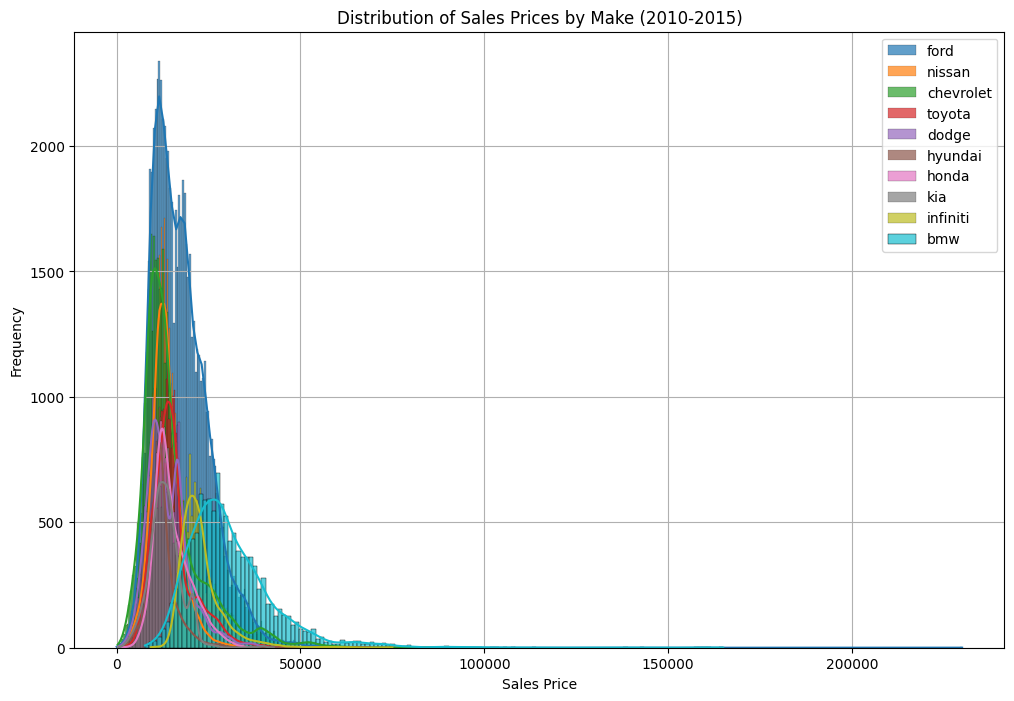

In [32]:
import seaborn as sns
filtered_df = df[(df['year'] >= 2010) & (df['year'] <= 2015)]

top_10_makes = filtered_df['make'].value_counts().nlargest(10).index.tolist()

plt.figure(figsize=(12, 8))
for make in top_10_makes:
    make_data = filtered_df[filtered_df['make'] == make]
    sns.histplot(make_data['sellingprice'], kde=True, label=make, alpha=0.7)

plt.title('Distribution of Sales Prices by Make (2010-2015)')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Sample narrative description.